# Problem statement
### Adult Salary Prediction

 Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not.
 * We have been given 15 features.
 
  


 

In [1]:
%pip install numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("adult3.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
len(df.columns)

15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.shape

(48842, 15)

In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='income', ylabel='count'>

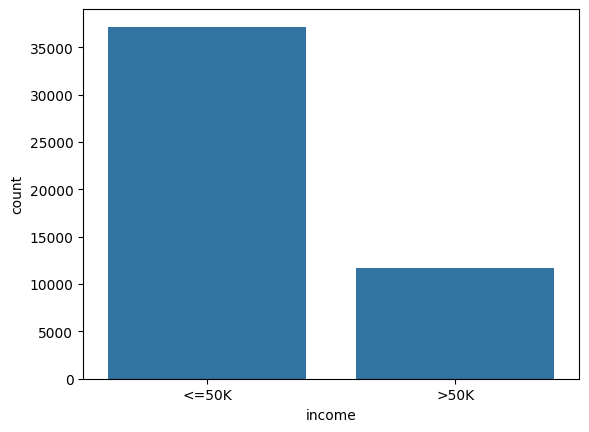

In [8]:
sns.countplot(x='income', data=df)

In [9]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [10]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## Exploratory data analysis and Feature Engineering

In [11]:
## Here we will check the missing values in our dataset
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [13]:
numerical

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [14]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  74
 fnlwgt  :  28523
 educational-num  :  16
 capital-gain  :  123
 capital-loss  :  99
 hours-per-week  :  96


In [15]:
df["educational-num"].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
c:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


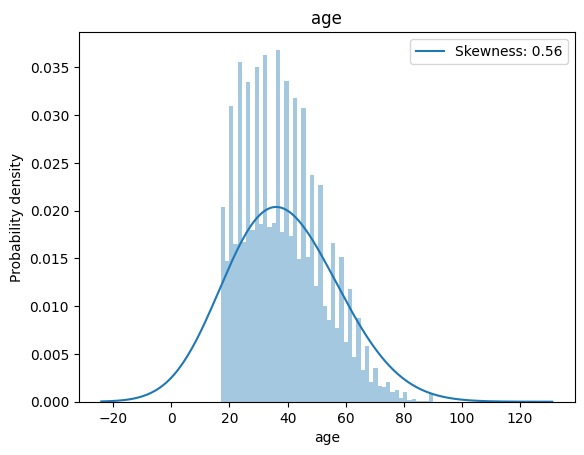

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
c:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


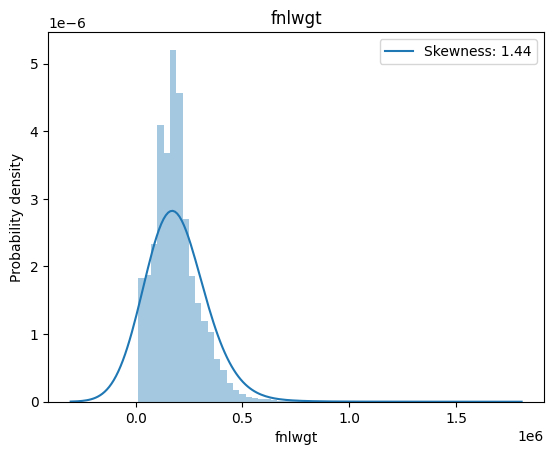

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
c:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


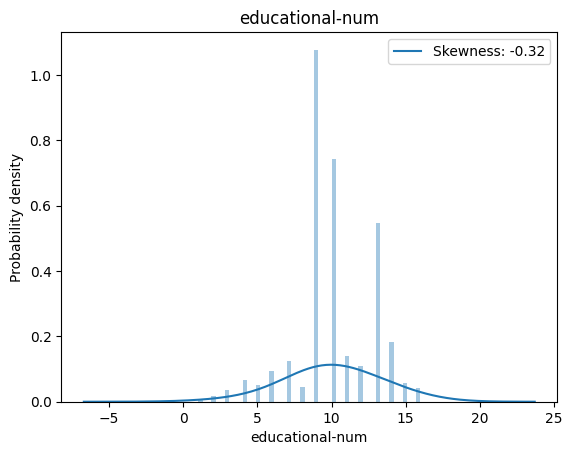

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
c:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


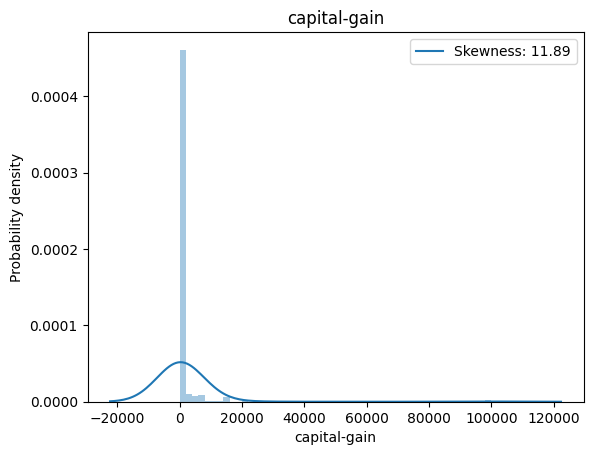

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
c:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


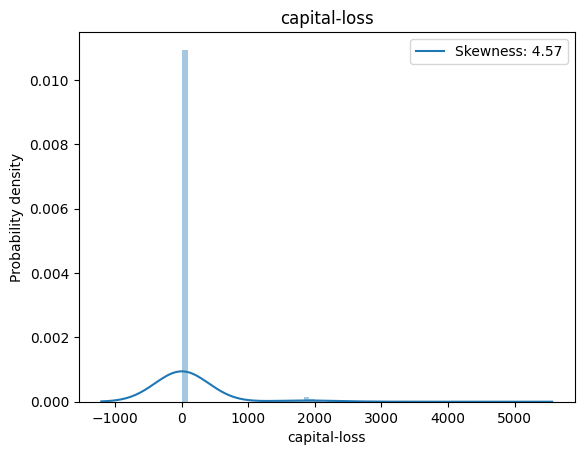

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\4183027030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
c:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


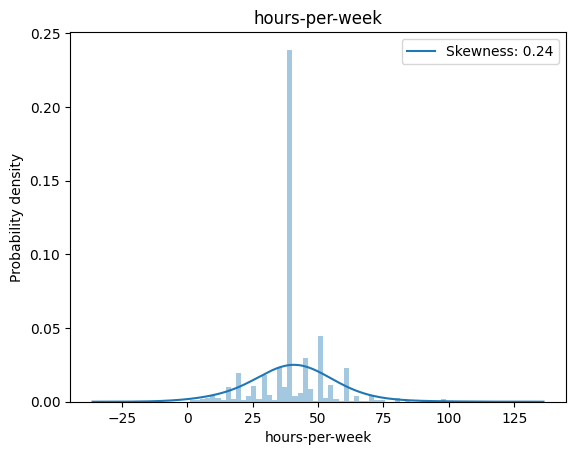

In [16]:
for feature in numerical:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [17]:
df["age"] = np.log(df["age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Handling categorical data 

In [19]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [20]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 gender  :  2
 native-country  :  42
 income  :  2


In [21]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

 
 
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

 
 
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

 
 
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-m

## Handling missing values in categorical features

In [22]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [23]:
df["occupation"].mode()[0]

'Prof-specialty'

**here we have less than 6 percent missing values so we can fill it with mode value**

In [24]:
df["workclass"] = df['workclass'].str.replace('?', 'Private')
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].str.replace('?', 'United-States')

In [25]:
# education Category
df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\3990654936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,


In [26]:
#martial status
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\209379333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)


In [27]:
# income
df["income"] = df["income"].replace({'<=50K': 0, '>50K': 1}, regex=True)

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\740176946.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["income"] = df["income"].replace({'<=50K': 0, '>50K': 1}, regex=True)


In [28]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,3.218876,Private,12.331833,school,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,3.637586,Private,11.405496,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,3.332205,Local-gov,12.727693,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3.784190,Private,11.984946,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,2.890372,Private,11.547298,higher,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [29]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  8
 education  :  6
 marital-status  :  3
 occupation  :  14
 relationship  :  6
 race  :  5
 gender  :  2
 native-country  :  41
 income  :  2


In [30]:
df["education"].unique()

array(['school', 'HS-grad', 'higher', 'Bachelors', 'Masters', 'Doctorate'],
      dtype=object)

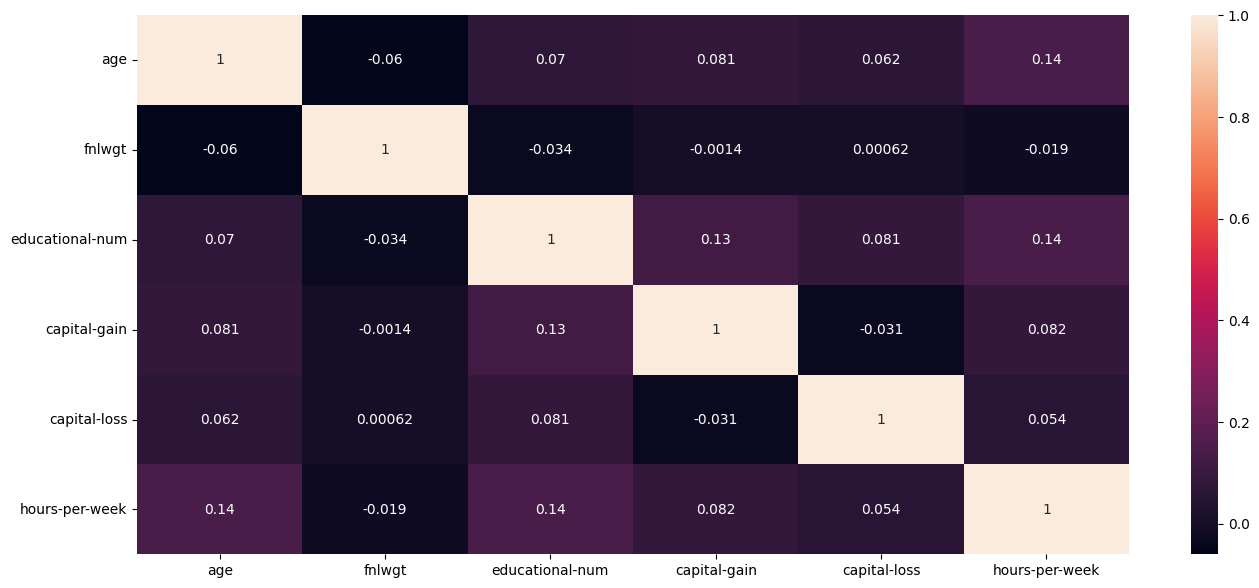

In [31]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df[numerical].corr(), annot=True);

In [32]:
%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [33]:
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,5,6,0,6,3,2,1,0,0,39,38,0
1,21,3,4212,2,8,1,4,0,4,1,0,0,49,38,0
2,11,1,25340,4,11,1,10,0,4,1,0,0,39,38,1
3,27,3,11201,4,9,1,6,0,2,1,98,0,39,38,1
4,1,3,5411,4,9,0,9,3,4,0,0,0,29,38,0


In [34]:
#sns.pairplot(df ,  height=10 ) ## Multivariate analysis

In [35]:
X_train = df.iloc[:,:-1]
y_train = df["income"]

## Feature engineering on test data

In [36]:
df_test = pd.read_csv("adult3.csv")
df_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [37]:
## apply log on skewed data
df_test["age"] = np.log(df_test["age"])
df_test["fnlwgt"] = np.log(df_test["fnlwgt"])

## handling missing values in categorical variable
df_test["workclass"] = df_test["workclass"].astype(str).str.replace('?', 'Private')
df_test["occupation"] = df_test["occupation"].astype(str).str.replace('?', 'Prof-specialty')
df_test["native-country"] = df_test["native-country"].astype(str).str.replace('?', 'United-States')

# education Category
df_test["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#martial status
df_test['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df_test['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

# income
df_test["income"] = df_test["income"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

df_test = df_test.apply(LabelEncoder().fit_transform)

C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\506806802.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
C:\Users\NICK\AppData\Local\Temp\ipykernel_1972\506806802.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

In [38]:
df_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,5,6,0,6,3,2,1,0,0,39,38,0
1,21,3,4212,2,8,1,4,0,4,1,0,0,49,38,0
2,11,1,25340,4,11,1,10,0,4,1,0,0,39,38,1
3,27,3,11201,4,9,1,6,0,2,1,98,0,39,38,1
4,1,3,5411,4,9,0,9,3,4,0,0,0,29,38,0


In [39]:
df_test.shape

(48842, 15)

In [40]:
X_test = df_test.iloc[:,:-1]
y_test = df_test["income"]

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy_score(y_test, prediction)

0.7688669587649973

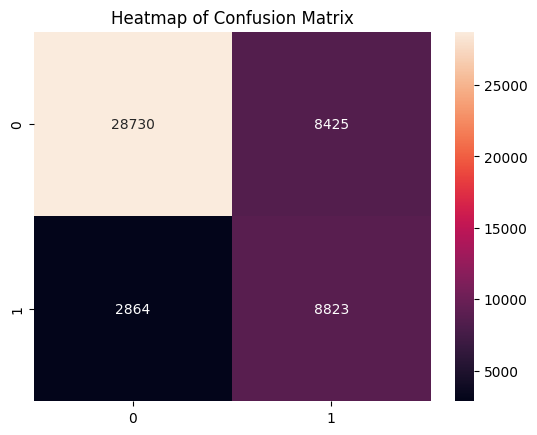

In [44]:
cm = confusion_matrix(y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [45]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     37155
           1       0.51      0.75      0.61     11687

    accuracy                           0.77     48842
   macro avg       0.71      0.76      0.72     48842
weighted avg       0.81      0.77      0.78     48842



## Random Forest

In [46]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9952704639449654

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     37155
           1       1.00      0.98      0.99     11687

    accuracy                           1.00     48842
   macro avg       1.00      0.99      0.99     48842
weighted avg       1.00      1.00      1.00     48842



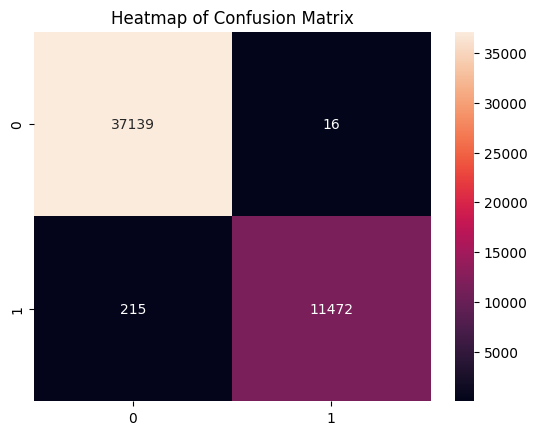

In [48]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

## Hyperparameter tuning  with random forest

In [49]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1,2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [1,2,3,4],
              }

In [50]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,RandomForestC...ndom_state=51)
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'max_features': [1, 2, ...], ...}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,23
,error_score,nan


In [51]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 4,
 'max_features': 1,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [52]:
random_search.best_estimator_

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=2, n_estimators=200, random_state=51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8087711395929733

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     37155
           1       0.56      0.90      0.69     11687

    accuracy                           0.81     48842
   macro avg       0.76      0.84      0.78     48842
weighted avg       0.87      0.81      0.82     48842



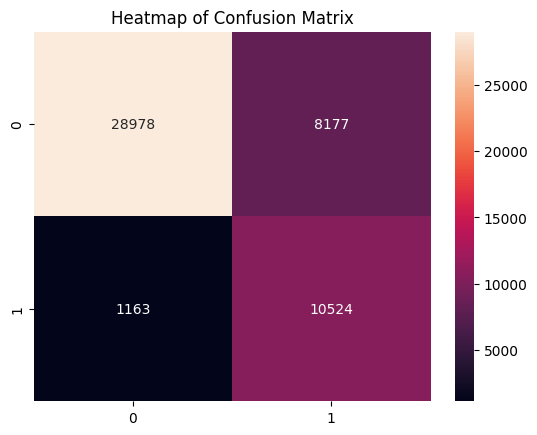

In [55]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [56]:
# Example input: replace values with your own details
sample = np.array([[35, 3, 23321, 2, 8, 1, 3, 5, 4, 0, 112, 0, 39, 38]])  # shape (1, 14)
sample_scaled = sc.transform(sample)
predicted_income = rf_classifier.predict(sample_scaled)
print("Predicted income category:", ">50K" if predicted_income[0] == 1 else "<=50K")

Predicted income category: >50K


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
